<a href="https://colab.research.google.com/github/Huberthbt/Lekcja1/blob/main/neurony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

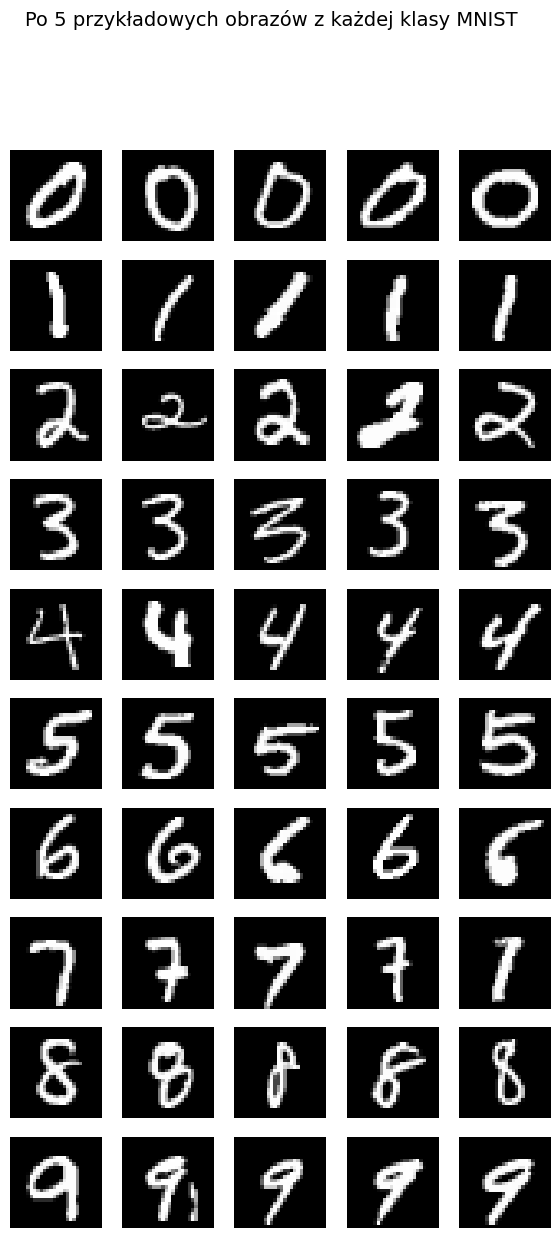

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(7,14))
fig.suptitle("Po 5 przykładowych obrazów z każdej klasy MNIST",fontsize=14)

rng = np.random.default_rng()

for digit in range(10):
  idxs = np.where(y_train == digit)[0]
  chosen_images = rng.choice(idxs, size=5, replace=False)

  for column, image in enumerate(chosen_images):
    place = axes[digit,column]
    place.imshow(x_train[image],cmap="gray")
    place.axis('off')

plt.show()

In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

x_train = x_train.astype("float32")/ 255.0
x_test = x_test.astype("float32")/ 255.0

x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

#(60000, 28, 28)
#(60000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),


    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,

)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8955 - loss: 0.3450 - val_accuracy: 0.9723 - val_loss: 0.0957
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9744 - loss: 0.0832 - val_accuracy: 0.9768 - val_loss: 0.0778
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9832 - loss: 0.0525 - val_accuracy: 0.9793 - val_loss: 0.0724
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9865 - loss: 0.0413 - val_accuracy: 0.9800 - val_loss: 0.0731
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9895 - loss: 0.0314 - val_accuracy: 0.9767 - val_loss: 0.0960
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9790 - val_loss: 0.0879
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9939 - loss: 0.0206 - val_accuracy: 0.9808 - val_loss: 0.0852
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9946 -

In [27]:
loss, accuracy = model.evaluate(x_test, y_test,verbose=0)
print(f"Strata: {loss:.4f}, Dokładność: {accuracy:.4f}")

Strata: 0.1104, Dokładność: 0.9780
